# **Villa / Appartement / Maison  Models**

Attributs: 
Type_zone, quartier, have_closure, dist_road, area, longitude, latitude

Attibuts pertinentes:
Type_zone, quartier, have_closure, dist_road, area, lon, lat,price 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats
import joblib
import requests

In [8]:
query = """query {
    offres(count:10000){
      data{
        id
        nature
        bien{
          type
          superficie
          prix
          descriptionBien
          coordonnee{
            latitude
            longitude
            ville
            quartier
            adresseCommun
          }
        }
      }
    }
}"""
url = 'https://api.immoask.com/public/graphql?'
r = requests.post(url, data={'query': query})
r.status_code
json_data = r.text
r.raise_for_status()            
## format the data in a more user-friendly dataframe object:
data_frame = pd.json_normalize(r.json()['data']['offres']['data'])
data_frame = data_frame.rename(columns={"bien.type": "type_property", "bien.superficie": "area", "bien.prix": "price", "bien.descriptionBien": "descp", "bien.coordonnee.latitude": "lat", "bien.coordonnee.longitude": "lon", "bien.coordonnee.ville": "ville", "bien.coordonnee.quartier": "quartier", "bien.coordonnee.adresseCommun": "common_address"})
data_frame = data_frame.drop(['descp','common_address','lat','lon', 'ville','id'], axis=1)
data_frame = data_frame[data_frame["nature"] == 'vendre']
data_frame = data_frame.drop(['nature'], axis=1)
# data_frame = data_frame[data_frame["type_property"] != 'terrain',]
data_frame.head()
#data_frame.to_csv('data_api.csv')

ConnectionError: HTTPSConnectionPool(host='api.immoask.com', port=443): Max retries exceeded with url: /public/graphql (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x129cf39a0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

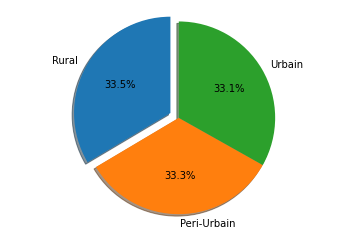

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = land_df.type_zone.unique()
sizes = land_df.type_zone.value_counts()
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<AxesSubplot:>

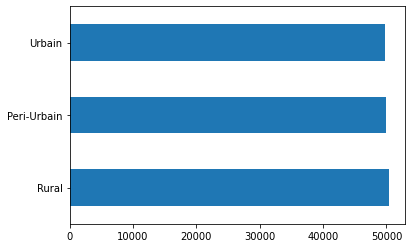

In [ ]:
land_df['type_zone'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

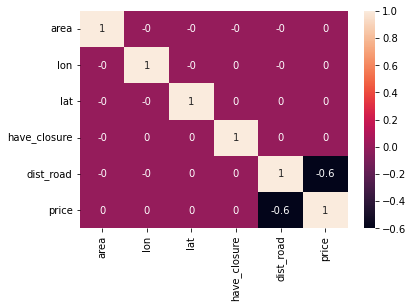

In [ ]:
#etude de la correlation
matrice_corr = land_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [ ]:
#
print ('Matrice de covariance :\n', land_df.cov())
print ('Matrice de correlation :\n', land_df.corr())

Matrice de covariance :
                       area           lon           lat  have_closure  \
area          1.092276e+08 -5.625154e+03 -2.922386e+03    -16.904230   
lon          -5.625154e+03  1.081999e+04 -1.306498e+01      0.000096   
lat          -2.922386e+03 -1.306498e+01  2.703072e+03      0.008876   
have_closure -1.690423e+01  9.575953e-05  8.875650e-03      0.250001   
dist_road    -1.216627e+04 -2.421488e+01  1.106466e+01      0.786402   
price         2.968092e+09  3.992842e+06  3.374822e+07  96645.588461   

                 dist_road         price  
area         -1.216627e+04  2.968092e+09  
lon          -2.421488e+01  3.992842e+06  
lat           1.106466e+01  3.374822e+07  
have_closure  7.864015e-01  9.664559e+04  
dist_road     8.338102e+04 -1.992727e+10  
price        -1.992727e+10  1.383932e+16  
Matrice de correlation :
                   area       lon       lat  have_closure  dist_road     price
area          1.000000 -0.005174 -0.005378     -0.003235  -0.0040

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# land_df['common_address']= label_encoder.fit_transform(land_df['common_address'])
land_df['type_zone']= label_encoder.fit_transform(land_df['type_zone'])
land_df['quartier']= label_encoder.fit_transform(land_df['quartier'])

In [ ]:
land_df.head()

,area,type_zone,quartier,lon,lat,have_closure,dist_road,price
0,951.0,1,14,59.934476,72.484075,0.0,874.0,12956855
1,885.0,0,14,17.643195,-3.008957,1.0,81.0,194713357
2,991.0,0,14,158.520123,-26.739380,0.0,521.0,12479069
3,986.0,1,14,-87.758817,68.618041,0.0,290.0,13840402
4,435.0,1,14,-22.792541,16.353610,1.0,972.0,12335417


In [ ]:
land_df.shape

(150124, 8)

In [ ]:
land_df.describe()

,area,type_zone,quartier,lon,lat,have_closure,dist_road,price
count,1.501240e+05,150124.000000,150124.000000,150124.000000,150124.000000,150124.000000,150124.000000,1.501240e+05
mean,6.829915e+02,0.998335,12.549253,-0.310904,-0.205848,0.499460,499.974728,5.998856e+07
std,1.045120e+04,0.815270,18.218806,104.019164,51.991081,0.500001,288.757724,1.176407e+08
min,1.000000e+00,0.000000,0.000000,-179.999298,-89.998665,0.000000,1.000000,1.008950e+05
25%,4.740000e+02,0.000000,1.000000,-90.493128,-45.206262,0.000000,249.000000,6.368982e+06
50%,6.490000e+02,1.000000,4.000000,-0.351150,-0.385193,0.000000,500.000000,1.255304e+07
75%,8.240000e+02,2.000000,14.000000,89.633343,44.841197,1.000000,750.000000,1.876283e+07
max,4.000000e+06,2.000000,67.000000,179.995150,89.997837,1.000000,1000.000000,1.050000e+09


In [ ]:
land_df.dtypes

area            float64
type_zone         int64
quartier          int64
lon             float64
lat             float64
have_closure    float64
dist_road       float64
price             int64
dtype: object

In [ ]:
land_df.price.mean()

59988556.99345874

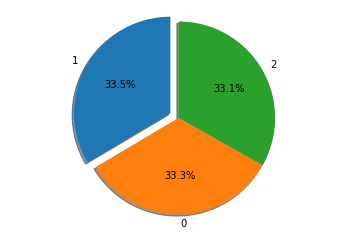

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = land_df.type_zone.unique()
sizes = land_df.type_zone.value_counts()
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
matrice_corr = land_df.corr()
print(matrice_corr)

                  area  type_zone  quartier       lon       lat  have_closure  \
area          1.000000  -0.000016  0.001712 -0.005174 -0.005378     -0.003235   
type_zone    -0.000016   1.000000 -0.002425  0.003290 -0.001679      0.004067   
quartier      0.001712  -0.002425  1.000000 -0.000985 -0.005501     -0.001181   
lon          -0.005174   0.003290 -0.000985  1.000000 -0.002416      0.000002   
lat          -0.005378  -0.001679 -0.005501 -0.002416  1.000000      0.000341   
have_closure -0.003235   0.004067 -0.001181  0.000002  0.000341      1.000000   
dist_road    -0.004031  -0.000632  0.000088 -0.000806  0.000737      0.005447   
price         0.002414   0.001270  0.000385  0.000326  0.005518      0.001643   

              dist_road     price  
area          -0.004031  0.002414  
type_zone     -0.000632  0.001270  
quartier       0.000088  0.000385  
lon           -0.000806  0.000326  
lat            0.000737  0.005518  
have_closure   0.005447  0.001643  
dist_road      1.0

In [ ]:
land_df.loc[:, land_df.columns != 'price'].columns

Index(['area', 'type_zone', 'quartier', 'lon', 'lat', 'have_closure',
       'dist_road'],
      dtype='object')

array([<AxesSubplot:title={'center':'area'}>,
       <AxesSubplot:title={'center':'type_zone'}>,
       <AxesSubplot:title={'center':'quartier'}>], dtype=object)

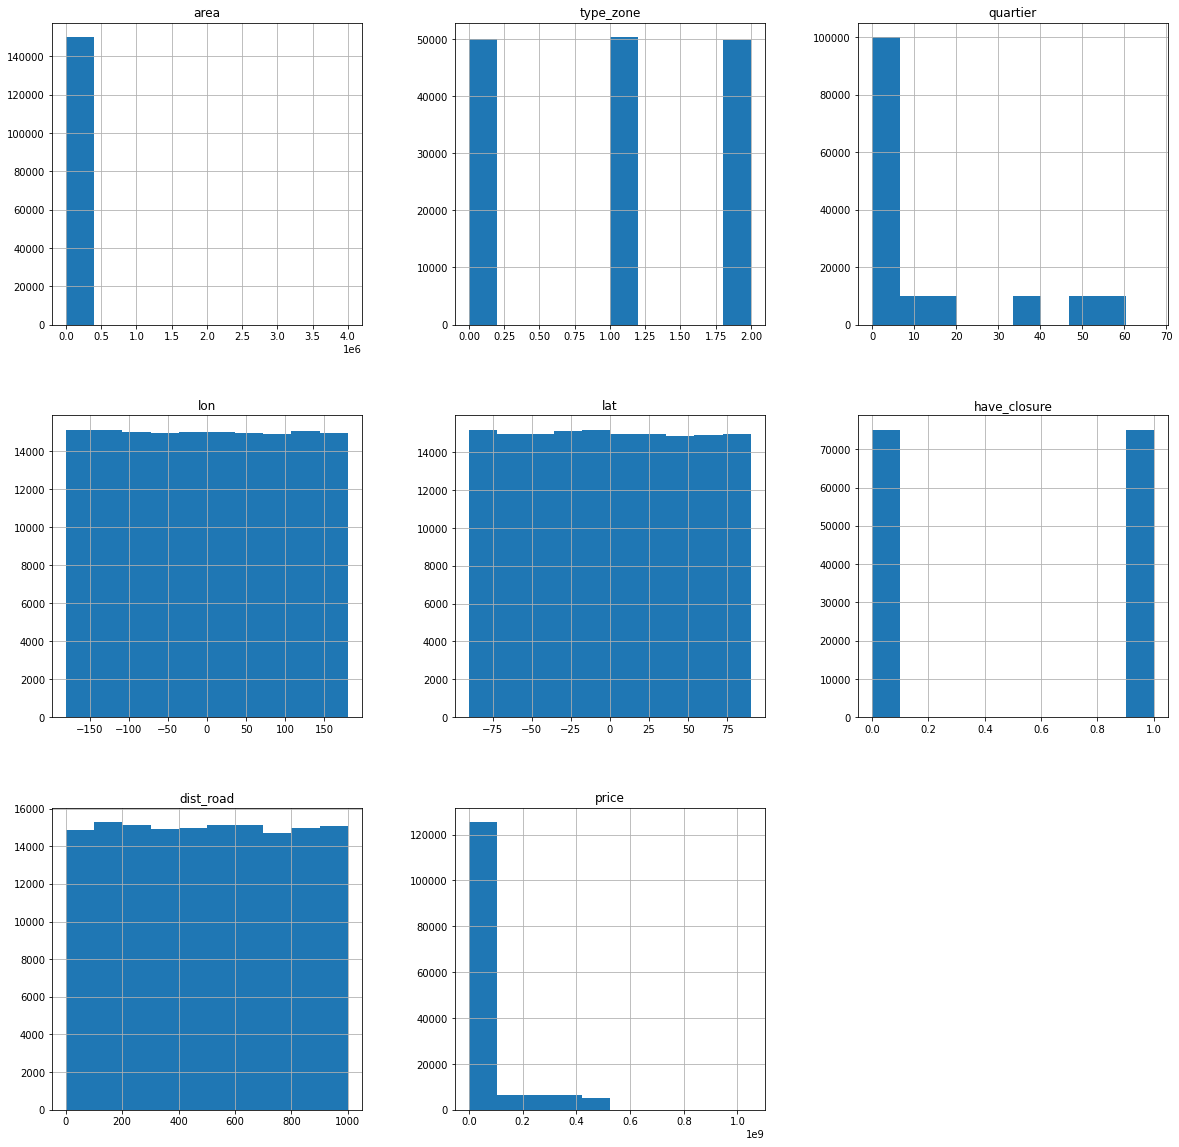

In [ ]:
land_df.hist(figsize = (20 ,20))[0]

In [ ]:
y = land_df.price.to_numpy()
X =  land_df.loc[:, land_df.columns != 'price'].to_numpy()
X = sm.add_constant(X) # une autre façons d'ajouter une constante

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:32:45   Log-Likelihood:            -2.9711e+06
No. Observations:              150124   AIC:                         5.942e+06
Df Residuals:                  150116   BIC:                         5.942e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.788e+08   6.48e+05    275.655      0.0

In [ ]:
# On fit le modele
price = land_df.price
features =  land_df.loc[:, land_df.columns != 'price']
model = LinearRegression()
results = model.fit(features, price)
# print(results.intercept_, results.coef_)
print(results.coef_)

# joblib.dump(results, "models/ml/models/land_model.joblib")


[ 1.07179532e+00  1.28621726e+05  3.07546468e+03 -1.51832793e+02
  1.34694637e+04  1.13725808e+06 -2.39002670e+05]


# Land price prediction for sell

In [ ]:
query = """query {
    offres(count:10000){
      data{
        id
        nature
        bien{
          type
          superficie
          prix
          descriptionBien
          coordonnee{
            latitude
            longitude
            ville
            quartier
            adresseCommun
          }
        }
      }
    }
}"""
url = 'https://api.immoask.com/public/graphql?'
r = requests.post(url, data={'query': query})
r.status_code
json_data = r.text
r.raise_for_status()            
## format the data in a more user-friendly dataframe object:
data_frame = pd.json_normalize(r.json()['data']['offres']['data'])
data_frame = data_frame.rename(columns={"bien.type": "type_property", "bien.superficie": "area", "bien.prix": "price", "bien.descriptionBien": "descp", "bien.coordonnee.latitude": "lat", "bien.coordonnee.longitude": "lon", "bien.coordonnee.ville": "ville", "bien.coordonnee.quartier": "quartier", "bien.coordonnee.adresseCommun": "common_address"})
data_frame = data_frame.drop(['descp','common_address','lat','lon', 'ville','id'], axis=1)
data_frame = data_frame[data_frame["nature"] == 'louer']
data_frame = data_frame.drop(['nature'], axis=1)
data_frame = data_frame[data_frame["type_property"] == 'terrain']
data_frame.head()

ConnectionError: HTTPSConnectionPool(host='api.immoask.com', port=443): Max retries exceeded with url: /public/graphql (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x190fbd5a0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
a = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/adwlato", orient='index')
b = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/Avédji", orient ='index')
c = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/Baguida", orient ='index')
d = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/bè", orient ='index')
e = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/Kégué", orient ='index')
f = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/LoméII", orient ='index')
g = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/Sagbado", orient ='index')
h = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/sanguera", orient ='index')
i = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/TokoinGbadago", orient ='index')
j = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/kodjoviakopé", orient ='index')
k = pd.read_json("/Users/admin/Pictures/expertim/fullexpertim/Terrain.json", orient ='index')

# k.rename(columns = {'quartier':'nom_quartier'}, inplace = True)

land_df = pd.concat([a,b,c,d,e,f,g,h,i,j,k,data_frame], ignore_index = True, verify_integrity=True)
# land_df.rename(columns = {'nom_quartier':'quartier'}, inplace = True)
land_df.to_json('models/ml/data/land_df.json')
land_df.columns
land_df.head()

In [ ]:
land_df = land_df.drop(['price','common_address','duration','type_property'], axis=1)
land_df.columns

In [ ]:
land_df.head()

In [ ]:
mode = land_df.mode()

land_df=land_df.fillna(mode.iloc[0])


In [ ]:
land_df.info()

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# land_df['common_address']= label_encoder.fit_transform(land_df['common_address'])
land_df['type_zone']= label_encoder.fit_transform(land_df['type_zone'])
land_df['quartier']= label_encoder.fit_transform(land_df['quartier'])

In [ ]:
land_df.describe

In [ ]:
# On fit le modele
bail_price = land_df.bail_price
features =  land_df.loc[:, land_df.columns != 'bail_price']
model = LinearRegression()
results = model.fit(features, bail_price)
# print(results.intercept_, results.coef_)
print(results.coef_)

# joblib.dump(results, "models/ml/models/land_model.joblib")


**Villa / Appartement / Maison  Models**

Attributs: 
Type_zone, quartier, have_closure, dist_road, area, longitude, latitude

**Studio Models**